<a href="https://colab.research.google.com/github/zainabbas313/OASIS-INFOBYTE-INTERNSHIP-TASKS/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OASIS INFOBYTE INTERNSHIP - TASK_05

# ABOUT DATASET

The dataset you have is named `Advertising.csv`. It is used for linear regression tasks and contains information about advertising spending across different media channels and the corresponding sales figures. Here’s a detailed breakdown of the dataset:

### Columns

1. **TV**: Amount spent on TV advertising (in thousands of dollars).
2. **Radio**: Amount spent on Radio advertising (in thousands of dollars).
3. **Newspaper**: Amount spent on Newspaper advertising (in thousands of dollars).
4. **Sales**: Sales figures (in thousands of units) corresponding to the advertising spend.

### Overview

- **Data Size**: The dataset contains 200 rows and 5 columns.
- **Usability**: It has been rated with usability metrics, indicating its quality and usefulness for various analyses.
- **Tags**: The dataset is tagged under Business, which suggests it is often used for business-related analyses, such as sales forecasting based on advertising expenditures.

### Related Analysis

- **Predictive Modeling**: You can build regression models to predict sales based on the spending in TV, Radio, and Newspapers.
- **Feature Importance**: Analyze which advertising channels have the most significant impact on sales.

### Summary

This dataset is a classic example used in introductory data science courses to demonstrate linear regression and predictive modeling techniques. It provides a straightforward way to understand the impact of various advertising channels on sales, which is valuable for both theoretical learning and practical applications in business analytics.

Feel free to ask if you need more details or specific analysis techniques related to this dataset!

# LIBRARIES

In [1]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import warnings


In [2]:
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Mounted at /content/drive


# LOAD DATASET

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SUMMER_2024/OASIS INFOBYTE/DATASET/advertising/Advertising.csv')

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# DATA CLEANING

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.isnull().sum().any()

False

In [8]:
df.drop('unnamed: 0', axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# DATA PRE-PROCESSING

## EDA & TRANSFORMATION

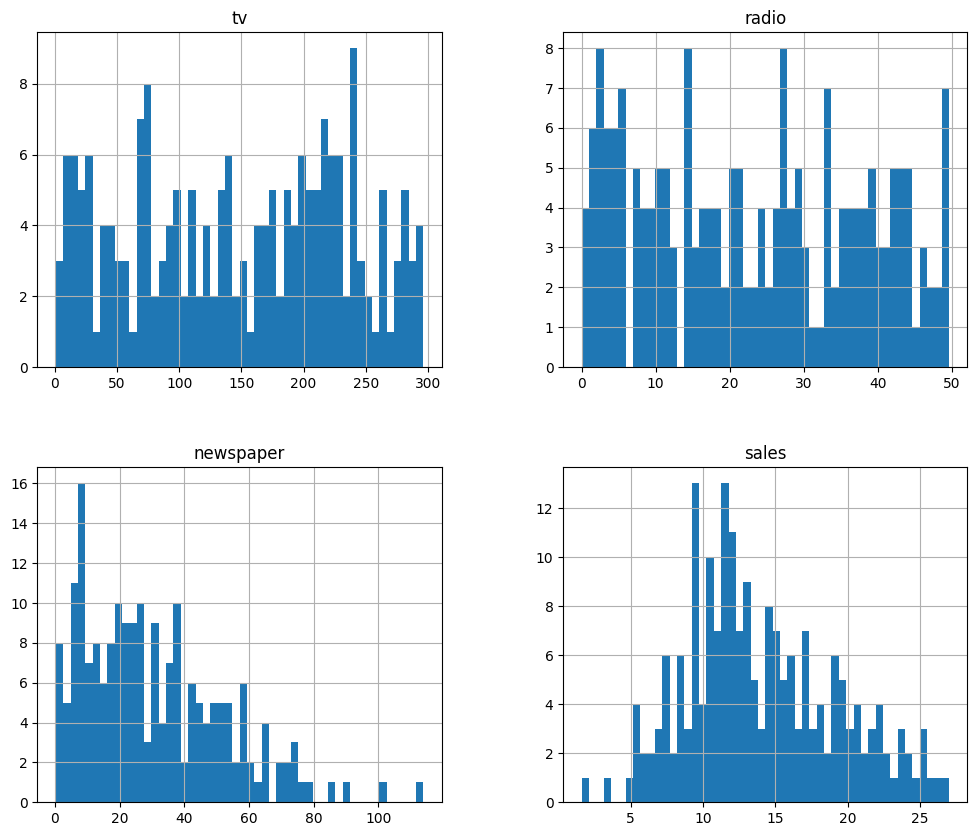

In [11]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

In [12]:
df['newspaper'] = np.log(df['newspaper'])

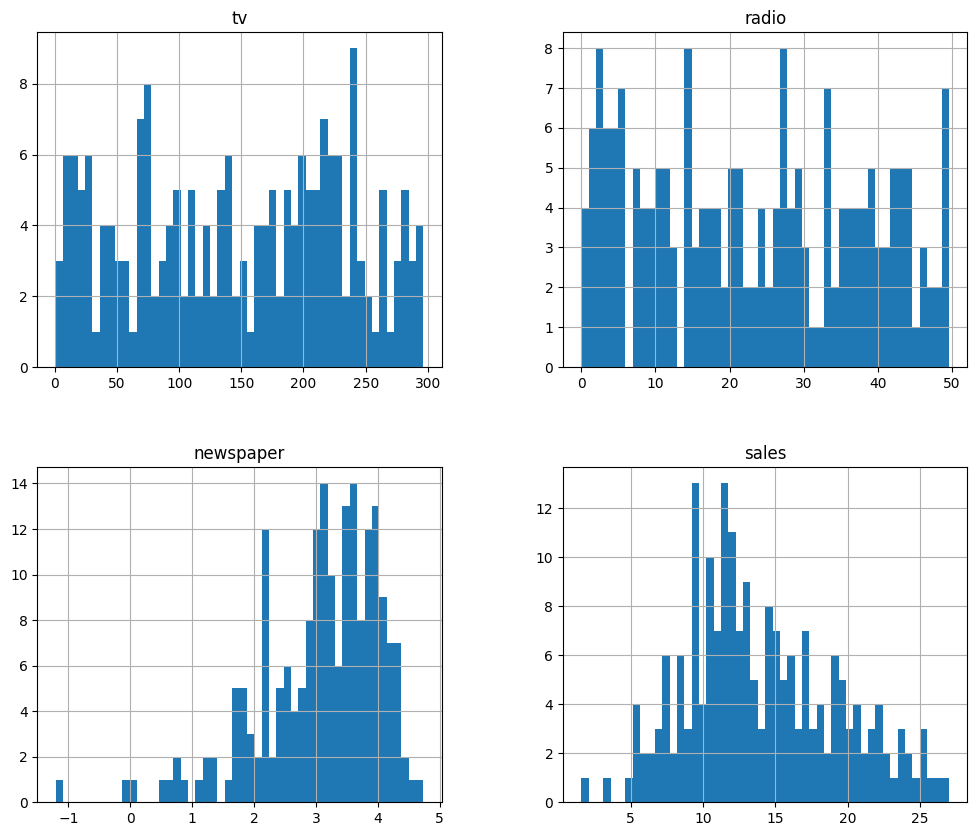

In [13]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

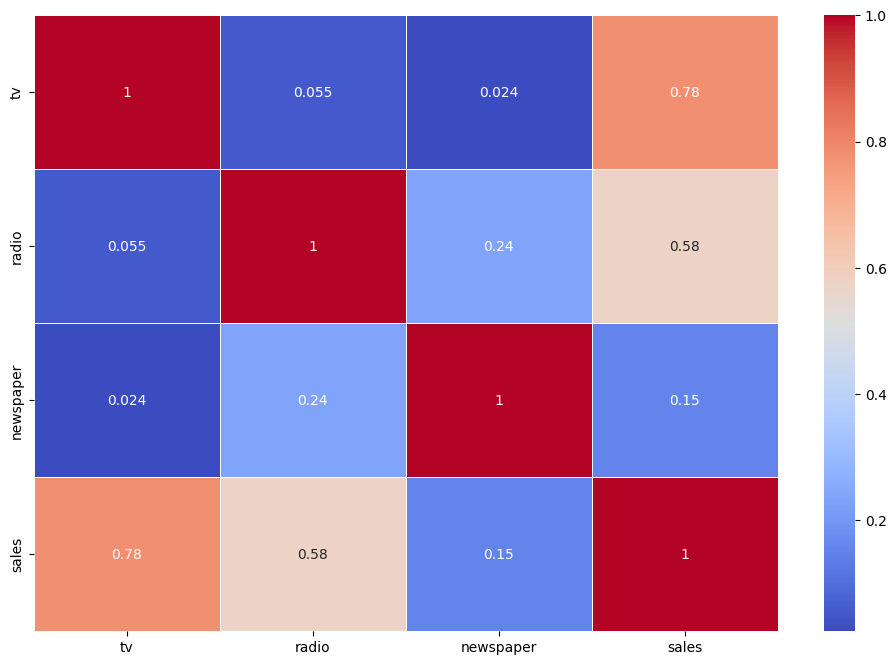

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## FEATURES SELECTION

In [16]:
x = df.drop('sales', axis = 1)
y = df.sales

x, y = shuffle(x, y, random_state=42)

In [17]:
model_sfs = RandomForestRegressor(random_state = 42)

In [18]:
sfs = SFS(model_sfs, k_features = 'best', forward = True, floating = True, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = 1, verbose = 2)

In [19]:
sfs.fit(x,y)


[2024-07-19 18:50:16] Features: 1/3 -- score: -3.6708447094214263
[2024-07-19 18:50:18] Features: 2/3 -- score: -0.6650322071654896
[2024-07-19 18:50:20] Features: 3/3 -- score: -0.7217321536038089

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=42),
                          floating=True, k_features=(1, 3),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [20]:
list(sfs.k_feature_names_)

['tv', 'radio']

In [22]:
x = df[list(sfs.k_feature_names_)]
y = df.sales

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state = 42, shuffle = True)

# MODELLING

In [24]:
model_l = LinearRegression()
model_r = RandomForestRegressor()

In [25]:
model_l.fit(xtrain,ytrain)

LinearRegression()

In [26]:
model_r.fit(xtest,ytest)

RandomForestRegressor()

# EVALUATION

In [27]:
pred_l = model_l.predict(xtest)


mse = mean_squared_error(ytest, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_l)
r2 = r2_score(ytest, pred_l)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')


Mean Squared Error (MSE): 3.137948009068354
Root Mean Squared Error (RMSE): 1.7714254173033517
Mean Absolute Error (MAE): 1.4443023138227578
R-squared (R2): 0.9005833101920356
Baseline MSE: 31.563593749999995
Baseline RMSE: 5.6181486051901475


In [28]:
pred_r = model_r.predict(xtest)

mse = mean_squared_error(ytest, pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_r)
r2 = r2_score(ytest, pred_r)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')


Mean Squared Error (MSE): 0.14018794999999742
Root Mean Squared Error (RMSE): 0.3744168131908574
Mean Absolute Error (MAE): 0.29909999999999465
R-squared (R2): 0.9955585554956017
Baseline MSE: 31.563593749999995
Baseline RMSE: 5.6181486051901475


# CROSS VALIDATION

In [29]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

scores_mse = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(xtrain, ytrain)
pred = model.predict(xtest)

mse_test = mean_squared_error(ytest, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(ytest, pred)
r2_test = r2_score(ytest, pred)

print('\n\n')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')


Mean MSE: 0.711345668749999
Standard Deviation of MSE: 0.36563072345001824
Mean RMSE: 0.8186358275771239
Standard Deviation of RMSE: 0.20293114733109982
Mean MAE: 0.5779562499999995
Standard Deviation of MAE: 0.06410603276993457
Mean R-squared: 0.9712421214082987
Standard Deviation of R-squared: 0.012496485195492053



Test Set MSE: 0.42897727499999805
Test Set RMSE: 0.6549635676890724
Test Set MAE: 0.5391249999999967
Test Set R-squared: 0.9864091117634538


# CONCLUSION

### Linear Regression Model
- **Mean Squared Error (MSE):** 3.138
- **Root Mean Squared Error (RMSE):** 1.771
- **Mean Absolute Error (MAE):** 1.444
- **R-squared (R²):** 0.901

### RandomForestRegressor Model
- **Mean Squared Error (MSE):** 0.140
- **Root Mean Squared Error (RMSE):** 0.374
- **Mean Absolute Error (MAE):** 0.299
- **R-squared (R²):** 0.996

### Baseline Model
- **Mean Squared Error (MSE):** 31.564
- **Root Mean Squared Error (RMSE):** 5.618
- **Mean Absolute Error (MAE):** Not explicitly provided for baseline, but significantly higher than model scores
- **R-squared (R²):** Not provided for baseline

### Analysis of Model Performance:
- **MSE and RMSE:** The RandomForestRegressor has much lower MSE (0.140 vs. 3.138) and RMSE (0.374 vs. 1.771) compared to the Linear Regression model, indicating that it has a lower average prediction error and better performance in terms of prediction accuracy.
- **MAE:** The RandomForestRegressor also has a lower MAE (0.299 vs. 1.444), suggesting it makes smaller average errors compared to the Linear Regression model.
- **R-squared (R²):** The RandomForestRegressor has a significantly higher R² (0.996 vs. 0.901), meaning it explains a greater proportion of the variance in the sales data compared to the Linear Regression model.

### Conclusion:
The **RandomForestRegressor** model is superior based on these evaluation metrics. It has lower MSE, RMSE, and MAE, and a higher R² value, indicating that it provides more accurate and reliable predictions compared to the Linear Regression model.